In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report,confusion_matrix,f1_score
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [36]:
df2 = pd.read_csv('/content/final_dataset_with_features.csv')

In [37]:
df2.columns

Index(['vacancy_type', 'area_orig', 'age', 'gender.id', 'education.level.id',
       'salary.amount', 'total_experience.months', 'month', 'year',
       'inflation_rate', 'interest_rate', 'Region Name',
       'avg_salary_per_region', 'potreb_price_fix_nabor',
       'appart_price_pervichniy_market', 'appart_price_vtorichniy_market',
       'vrp_2023', 'percent_children', 'percent_elderly',
       'median_profit_per_person', 'relation_profit_prozit_minimum',
       'natural_prirost_rozhd', 'mortality', 'median_salary',
       'percent_with_internet', 'migration_prirost', 'number_top_school',
       'prirost_naselenia', 'percent_poor', 'rate_of_quality_life'],
      dtype='object')

In [38]:
df2['appart_price_pervichniy_market'] = pd.to_numeric(df2['appart_price_pervichniy_market'], errors='coerce')


In [39]:
df2=df2.drop(columns=['area_orig', 'month', 'year'])

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59690 entries, 0 to 59689
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vacancy_type                    59690 non-null  object 
 1   age                             59690 non-null  float64
 2   gender.id                       59690 non-null  object 
 3   education.level.id              59690 non-null  float64
 4   salary.amount                   59690 non-null  float64
 5   total_experience.months         59690 non-null  float64
 6   inflation_rate                  59690 non-null  float64
 7   interest_rate                   59690 non-null  int64  
 8   Region Name                     59690 non-null  object 
 9   avg_salary_per_region           59690 non-null  float64
 10  potreb_price_fix_nabor          59690 non-null  float64
 11  appart_price_pervichniy_market  59681 non-null  float64
 12  appart_price_vtorichniy_market  

In [41]:
df2 = pd.get_dummies(df2, columns=['vacancy_type', 'gender.id','Region Name'
])

In [65]:
df2.shape

(59690, 36)

In [63]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

In [45]:
df_low.shape

(25986, 36)

In [46]:
df_medium.shape

(4599, 36)

In [47]:
df_high.shape

(29105, 36)

Linear Regression Performance Metrics:
MSE: 246835665.3253
MAE: 12718.5134
RMSE: 15711.0046
R2 Score: 0.1928
--------------------------------------------------
Model Coefficients:
Intercept: 52759.2494
Feature 1 coefficient: -649.2583
Feature 2 coefficient: 2181.3865
Feature 3 coefficient: 3615.5428
Feature 4 coefficient: 501.7002
Feature 5 coefficient: -23.7952
Feature 6 coefficient: -195.1361
Feature 7 coefficient: 282.4338
Feature 8 coefficient: -562.4327
Feature 9 coefficient: 599.6796
Feature 10 coefficient: -427.0663
Feature 11 coefficient: 1204.6046
Feature 12 coefficient: 861.3660
Feature 13 coefficient: -8.7443
Feature 14 coefficient: -786.9188
Feature 15 coefficient: 1919.3714
Feature 16 coefficient: 1412.0647
Feature 17 coefficient: 837.6500
Feature 18 coefficient: -66.3019
Feature 19 coefficient: 227.2365
Feature 20 coefficient: -22.1671
Feature 21 coefficient: -361.5925
Feature 22 coefficient: -61.9767
Feature 23 coefficient: 1641.2596
Feature 24 coefficient: 134.9691
Feat

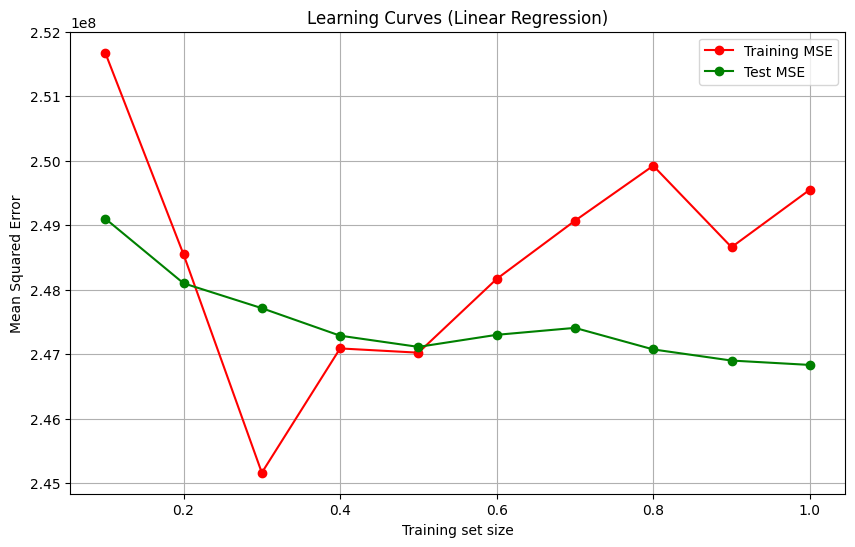


Final Loss Values:
Training Loss (MSE): 249552012.8550
Test Loss (MSE): 246835665.3253
Difference: 2716347.5297


In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

linear_model = LinearRegression()
linear_model.fit(Xtrain, Ytrain)

y_pred_linear = linear_model.predict(Xtest)

mse_linear = mean_squared_error(Ytest, y_pred_linear)
mae_linear = mean_absolute_error(Ytest, y_pred_linear)
r2_linear = r2_score(Ytest, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print("="*50)
print("Linear Regression Performance Metrics:")
print("="*50)
print(f"MSE: {mse_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"R2 Score: {r2_linear:.4f}")
print("-"*50)
print("Model Coefficients:")
print(f"Intercept: {linear_model.intercept_:.4f}")
for i, coef in enumerate(linear_model.coef_):
    print(f"Feature {i+1} coefficient: {coef:.4f}")
print("="*50)

train_sizes = np.linspace(0.1, 1.0, 10)
train_errors = []
test_errors = []

for size in train_sizes:
    n_samples = int(size * len(Xtrain))
    X_subset = Xtrain[:n_samples]
    y_subset = Ytrain[:n_samples]

    linear_model.fit(X_subset, y_subset)

    train_pred = linear_model.predict(X_subset)
    test_pred = linear_model.predict(Xtest)

    train_errors.append(mean_squared_error(y_subset, train_pred))
    test_errors.append(mean_squared_error(Ytest, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, 'o-', color="r", label="Training MSE")
plt.plot(train_sizes, test_errors, 'o-', color="g", label="Test MSE")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (Linear Regression)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

final_train_loss = mean_squared_error(Ytrain, linear_model.predict(Xtrain))
final_test_loss = mse_linear
print("\nFinal Loss Values:")
print(f"Training Loss (MSE): {final_train_loss:.4f}")
print(f"Test Loss (MSE): {final_test_loss:.4f}")
print(f"Difference: {abs(final_train_loss - final_test_loss):.4f}")

In [ ]:
df_all_features=df2

In [ ]:
x=df_all_features.drop(columns=['salary.amount'])
y=df_all_features['salary.amount']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.impute import SimpleImputer


In [ ]:
print("Пропущенные значения в Xtrain до обработки:", Xtrain.isna().sum().sum())
print("Пропущенные значения в Xtest до обработки:", Xtest.isna().sum().sum())

Пропущенные значения в Xtrain до обработки: 8
Пропущенные значения в Xtest до обработки: 1


In [ ]:
imputer = SimpleImputer(strategy='mean')
Xtrain = imputer.fit_transform(Xtrain)
Xtest = imputer.transform(Xtest)

In [ ]:
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest=scaler.transform(Xtest)

In [ ]:
df_all_features=df_all_features.dropna()

In [ ]:
!pip install scikit-learn pytorch-tabnet pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
df_all_features=df_all_features.drop(columns=['percent_children', 'percent_elderly'])

In [ ]:
missing_counts = df_all_features.isnull().sum()
missing_counts

,0
age,0
education.level.id,0
salary.amount,0
total_experience.months,0
inflation_rate,0
...,...
Region Name_Чувашская Республика,0
Region Name_Ямало-Ненецкий авт. округ,0
Region Name_Ярославская область,0
Region Name_г.Москва,0


# Linear Regression

Linear Regression Performance Metrics:
MSE: 249943130.0003
MAE: 12836.8117
RMSE: 15809.5898
R2 Score: 0.2143
--------------------------------------------------
Model Coefficients:
Intercept: 57734.9197
Feature 1 coefficient: -1141.1329
Feature 2 coefficient: 1979.0860
Feature 3 coefficient: 3823.2545
Feature 4 coefficient: 242.6820
Feature 5 coefficient: 240.4171
Feature 6 coefficient: -445.3763
Feature 7 coefficient: 496.3515
Feature 8 coefficient: 441.6055
Feature 9 coefficient: 250.3205
Feature 10 coefficient: 135.4550
Feature 11 coefficient: -144.4096
Feature 12 coefficient: -194.3689
Feature 13 coefficient: 398.4571
Feature 14 coefficient: 363.1545
Feature 15 coefficient: 217.1628
Feature 16 coefficient: -37.1441
Feature 17 coefficient: 523.3938
Feature 18 coefficient: 320.0730
Feature 19 coefficient: 490.7127
Feature 20 coefficient: 195.2674
Feature 21 coefficient: 404.4521
Feature 22 coefficient: -164.2865
Feature 23 coefficient: 567.5443
Feature 24 coefficient: -56.5493
Feature

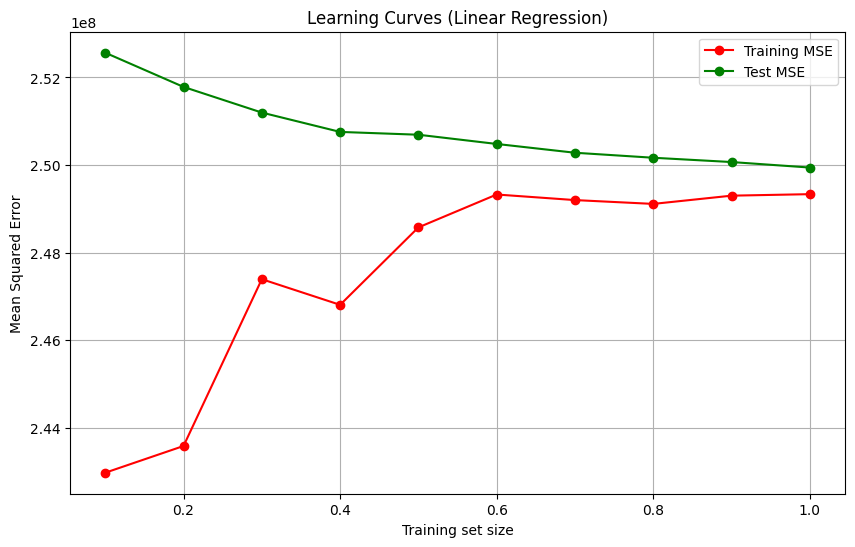


Final Loss Values:
Training Loss (MSE): 249335420.2501
Test Loss (MSE): 249943130.0003
Difference: 607709.7503


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

linear_model = LinearRegression()
linear_model.fit(Xtrain, Ytrain)

y_pred_linear = linear_model.predict(Xtest)

mse_linear = mean_squared_error(Ytest, y_pred_linear)
mae_linear = mean_absolute_error(Ytest, y_pred_linear)
r2_linear = r2_score(Ytest, y_pred_linear)
rmse_linear = np.sqrt(mse_linear)

print("="*50)
print("Linear Regression Performance Metrics:")
print("="*50)
print(f"MSE: {mse_linear:.4f}")
print(f"MAE: {mae_linear:.4f}")
print(f"RMSE: {rmse_linear:.4f}")
print(f"R2 Score: {r2_linear:.4f}")
print("-"*50)
print("Model Coefficients:")
print(f"Intercept: {linear_model.intercept_:.4f}")
for i, coef in enumerate(linear_model.coef_):
    print(f"Feature {i+1} coefficient: {coef:.4f}")
print("="*50)

train_sizes = np.linspace(0.1, 1.0, 10)
train_errors = []
test_errors = []

for size in train_sizes:
    n_samples = int(size * len(Xtrain))
    X_subset = Xtrain[:n_samples]
    y_subset = Ytrain[:n_samples]

    linear_model.fit(X_subset, y_subset)

    train_pred = linear_model.predict(X_subset)
    test_pred = linear_model.predict(Xtest)

    train_errors.append(mean_squared_error(y_subset, train_pred))
    test_errors.append(mean_squared_error(Ytest, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_errors, 'o-', color="r", label="Training MSE")
plt.plot(train_sizes, test_errors, 'o-', color="g", label="Test MSE")
plt.xlabel("Training set size")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curves (Linear Regression)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

final_train_loss = mean_squared_error(Ytrain, linear_model.predict(Xtrain))
final_test_loss = mse_linear
print("\nFinal Loss Values:")
print(f"Training Loss (MSE): {final_train_loss:.4f}")
print(f"Test Loss (MSE): {final_test_loss:.4f}")
print(f"Difference: {abs(final_train_loss - final_test_loss):.4f}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

scaler = StandardScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

alphas = np.logspace(-4, 2, 50)

def find_best_alpha(model, X, y):
    scores = []
    for alpha in alphas:
        if model == 'ridge':
            m = Ridge(alpha=alpha)
        else:
            m = Lasso(alpha=alpha, max_iter=10000)
        scores.append(np.mean(cross_val_score(m, X, y, cv=5, scoring='neg_mean_squared_error')))
    best_alpha = alphas[np.argmax(scores)]
    return best_alpha

best_alpha_ridge = find_best_alpha('ridge', Xtrain_scaled, Ytrain)
best_alpha_lasso = find_best_alpha('lasso', Xtrain_scaled, Ytrain)

models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=best_alpha_ridge),
    'Lasso': make_pipeline(
        StandardScaler(),
        Lasso(alpha=best_alpha_lasso, max_iter=50000, tol=1e-4)
    )
}

results = {}
for name, model in models.items():
    model.fit(Xtrain, Ytrain)
    y_pred = model.predict(Xtest) if name != 'Lasso' else model.named_steps['lasso'].predict(Xtest_scaled)
    results[name] = {
        'mse': mean_squared_error(Ytest, y_pred),
        'mae': mean_absolute_error(Ytest, y_pred),
        'r2': r2_score(Ytest, y_pred),
        'coef': model.coef_ if name != 'Lasso' else model.named_steps['lasso'].coef_
    }

print("="*60)
print("{:<10} {:<10} {:<10} {:<10} {:<15}".format(
    'Model', 'MSE', 'MAE', 'R2', 'Non-zero coeffs'))
print("="*60)
for name, res in results.items():
    non_zero = np.sum(res['coef'] != 0) if name != 'Linear' else len(res['coef'])
    print("{:<10} {:<10.4f} {:<10.4f} {:<10.4f} {:<15}".format(
        name, res['mse'], res['mae'], res['r2'], non_zero))
print("="*60)

plt.figure(figsize=(12, 6))
x = np.arange(len(results['Linear']['coef']))
width = 0.25

plt.bar(x - width, results['Linear']['coef'], width, label='Linear')
plt.bar(x, results['Ridge']['coef'], width, label=f'Ridge (α={best_alpha_ridge:.2f})')
plt.bar(x + width, results['Lasso']['coef'], width, label=f'Lasso (α={best_alpha_lasso:.2f})')

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Feature Coefficients")
plt.legend()
plt.grid(True, linestyle=':', alpha=0.7)
plt.show()

best_model = Ridge(alpha=best_alpha_ridge)
train_sizes, train_scores, test_scores = learning_curve(
    best_model, Xtrain_scaled, Ytrain, cv=5,
    scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, -np.mean(train_scores, axis=1), 'o-', color="r", label="Training MSE")
plt.plot(train_sizes, -np.mean(test_scores, axis=1), 'o-', color="g", label="Test MSE")
plt.xlabel("Training Set Size")
plt.ylabel("Mean Squared Error")
plt.title(f"Learning Curves (Ridge Regression, α={best_alpha_ridge:.2f})")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+12, tolerance: 1.224e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.249e+12, tolerance: 1.222e+09
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.066e+12, tolerance: 1.217e

# Gradient Boosting Regressor

In [ ]:
columns_to_keep = ['rate_of_quality_life',
'median_profit_per_person',
'relation_profit_prozit_minimum',
'appart_price_vtorichniy_market',
'potreb_price_fix_nabor',
'migration_prirost',
'percent_with_internet',
'salary.amount',
'percent_poor',
'vacancy_type',
                  'Region Name'
]
df_clean_iqr = df_all_features[columns_to_keep]

In [ ]:
df_clean_iqr = pd.get_dummies(df_clean_iqr, columns=['vacancy_type', 'Region Name'
])

In [ ]:
df_clean_iqr

,rate_of_quality_life,median_profit_per_person,relation_profit_prozit_minimum,appart_price_vtorichniy_market,potreb_price_fix_nabor,migration_prirost,percent_with_internet,salary.amount,percent_poor,vacancy_type_2ЛТП,...,Region Name_Удмуртская Республика,Region Name_Ульяновская область,Region Name_Хабаровский край,Region Name_Ханты-Мансийский авт. округ - Югра,Region Name_Челябинская область,Region Name_Чувашская Республика,Region Name_Ямало-Ненецкий авт. округ,Region Name_Ярославская область,Region Name_г.Москва,Region Name_г.Санкт-Петербург
0,36.372,20627.3,1.69,101743.0,21504.0,-74.12,63.6,40000.0,21.4,False,...,False,False,False,False,False,False,False,False,False,False
1,56.789,19311.4,2.08,65505.0,18529.0,-42.74,56.8,30000.0,14.5,False,...,False,False,False,False,False,False,False,False,False,False
2,36.372,20627.3,1.69,101743.0,21504.0,-74.12,63.6,35000.0,21.4,False,...,False,False,False,False,False,False,False,False,False,False
3,55.762,18182.7,1.97,76760.0,18674.0,-24.93,61.8,60000.0,17.4,False,...,False,False,False,False,False,False,False,False,False,False
4,55.762,18182.7,1.97,76760.0,18674.0,-24.93,61.8,60000.0,17.4,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59685,57.681,32419.0,2.26,105409.0,24992.0,-27.73,75.0,70000.0,12.5,False,...,False,False,True,False,False,False,False,False,False,False
59686,55.762,18182.7,1.97,76760.0,18674.0,-24.93,61.8,40000.0,17.4,False,...,False,False,False,False,False,False,False,False,False,False
59687,36.372,20627.3,1.69,101743.0,21504.0,-74.12,63.6,50000.0,21.4,False,...,False,False,False,False,False,False,False,False,False,False
59688,49.924,20866.7,1.82,98731.0,20163.0,-24.63,62.8,55000.0,20.0,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

class GradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.initial_pred = None

    def fit(self, X, y):
        self.initial_pred = np.mean(y)
        pred = np.full_like(y, self.initial_pred, dtype=np.float64)

        for _ in range(self.n_estimators):
            residuals = y - pred
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residuals)
            pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)

    def predict(self, X):
        pred = np.full(X.shape[0], self.initial_pred, dtype=np.float64)
        for tree in self.trees:
            pred += self.learning_rate * tree.predict(X)
        return pred

if __name__ == "__main__":
    X=df_clean_iqr.drop(columns=['salary.amount'])
    y=df_clean_iqr['salary.amount']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    gb = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=3)
    gb.fit(X_train, y_train)
    y_pred = gb.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print("Метрики качества модели:")
    print(f"MAE (Средняя абсолютная ошибка): {mae:.4f}")
    print(f"MSE (Среднеквадратичная ошибка): {mse:.4f}")
    print(f"RMSE (Корень из MSE): {rmse:.4f}")
    #print(f"MAPE: {mape:.4f}")
    print(f"R² (Коэффициент детерминации): {r2:.4f}")

Метрики качества модели:
MAE (Средняя абсолютная ошибка): 13792.5253
MSE (Среднеквадратичная ошибка): 277090648.2385
RMSE (Корень из MSE): 16646.0400
R² (Коэффициент детерминации): 0.1363


In [ ]:
df_all_features.shape

(59690, 106)

In [ ]:
df_all_features=df_all_features.dropna()

In [ ]:
df_all_features.columns = [f'c{i+1}' for i in range(len(df_all_features.columns))]


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = df_all_features
X = df.drop(columns=['salary.amount'])
y = df['salary.amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

base_gb = GradientBoostingRegressor(
n_estimators=181,
    learning_rate=0.20214862522004154,
    max_depth=4,
    min_samples_split=9,
    min_samples_leaf=2,
    subsample=0.9212026339680122,
    max_features=None,
    random_state=42
)

ensemble = BaggingRegressor(
    estimator=base_gb,
    n_estimators=3,
    max_samples=0.8,
    random_state=42,
    n_jobs=-1
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ensemble', ensemble)
])


model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

MAE: 13404.20547495457


# Stacking Model

In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split


df = df_all_features
X = df.drop(columns=['c3'])
y = df['c3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gb_model = GradientBoostingRegressor(

 max_depth=5,
                          min_samples_leaf=2, min_samples_split=12,
                          n_estimators=175, random_state=42,
                          subsample=0.7912138326840713
)

rf_model = RandomForestRegressor(
    max_depth=13,
    max_features=None,
    min_samples_leaf=3,
    min_samples_split=18,
    n_estimators=222,
    n_jobs=-1,
    random_state=42
)

lgb_model = LGBMRegressor(
    num_leaves=245,
    max_depth=4,
    learning_rate=0.10368980231785788,
    n_estimators=264,
    min_child_samples=13,
    subsample=0.8556391975919111,
    colsample_bytree=0.7811969309029951,
    reg_alpha=0.6901682685174545,
    reg_lambda=0.9852504970380468,
    random_state=42,
    n_jobs=-1
)

stacking_model = StackingRegressor(
    estimators=[
        ('gb', gb_model),
        ('rf', rf_model),
        ('lgb', lgb_model)
    ],
    final_estimator=LinearRegression(),
    cv=5,
    n_jobs=-1
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE стекинга: {mae:.4f}")

for name, model in [('GradientBoosting', gb_model),
                    ('RandomForest', rf_model),
                    ('LightGBM', lgb_model)]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f"MAE {name}: {mae:.4f}")

ValueError: could not convert string to float: 'Агент ГАП '

In [ ]:
! pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 13.1 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer, mean_absolute_error
import numpy as np


def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 6),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.7, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    }

    model = GradientBoostingRegressor(**params, random_state=42)

    score = cross_val_score(
        model,
        X_train,
        y_train,
        cv=3,
        scoring=make_scorer(mean_absolute_error),
        n_jobs=-1
    ).mean()

    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=70)
print("Best trial:")
trial = study.best_trial
print(f"  MAE: {trial.value}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

best_model = GradientBoostingRegressor(**trial.params, random_state=42)
best_model.fit(X_train, y_train)

[I 2025-05-21 20:25:42,852] A new study created in memory with name: no-name-9b0daa05-142c-43c3-ba4b-5b0a42fd141f
[I 2025-05-21 20:26:01,857] Trial 0 finished with value: 12537.152616977119 and parameters: {'n_estimators': 112, 'learning_rate': 0.2206701729631465, 'max_depth': 4, 'min_samples_split': 2, 'min_samples_leaf': 7, 'subsample': 0.7921676898506349, 'max_features': 'sqrt'}. Best is trial 0 with value: 12537.152616977119.
[I 2025-05-21 20:26:18,117] Trial 1 finished with value: 12575.696091673572 and parameters: {'n_estimators': 113, 'learning_rate': 0.2017401205788594, 'max_depth': 6, 'min_samples_split': 15, 'min_samples_leaf': 2, 'subsample': 0.7374987815508067, 'max_features': 'sqrt'}. Best is trial 0 with value: 12537.152616977119.
[I 2025-05-21 20:26:23,739] Trial 2 finished with value: 12814.091534084298 and parameters: {'n_estimators': 99, 'learning_rate': 0.05114462569485378, 'max_depth': 3, 'min_samples_split': 10, 'min_samples_leaf': 10, 'subsample': 0.97885053563439

Best trial:
  MAE: 12492.447490905191
  Params: 
    n_estimators: 175
    learning_rate: 0.0624657892127437
    max_depth: 5
    min_samples_split: 12
    min_samples_leaf: 2
    subsample: 0.7912138326840713
    max_features: None


GradientBoostingRegressor(learning_rate=0.0624657892127437, max_depth=5,
                          min_samples_leaf=2, min_samples_split=12,
                          n_estimators=175, random_state=42,
                          subsample=0.7912138326840713)

# CatBoost

In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 3.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor, Pool, cv

In [ ]:
import pandas as pd

def get_non_numeric_features(df, exclude_target=True, target_col=None):

    cat_features = []

    for column in df.columns:
        if exclude_target and column == target_col:
            continue

        if not pd.api.types.is_numeric_dtype(df[column]):
            cat_features.append(column)

    return cat_features

data = df_all_features
cat_features = get_non_numeric_features(data, target_col="salary.amount")

print("Нечисловые (категориальные) признаки:", cat_features)

Нечисловые (категориальные) признаки: ['vacancy_type', 'area_orig', 'gender.id', 'Region Name', 'appart_price_pervichniy_market']


In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostRegressor, Pool, cv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

data = df_all_features
if np.abs(data["salary.amount"].skew()) > 1:
    data["salary_log"] = np.log1p(data["salary.amount"])
    y_col = "salary_log"
else:
    y_col = "salary.amount"

X = data.drop(columns=["salary.amount", "salary_log"], errors="ignore")
y = data[y_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostRegressor(
    cat_features=cat_features,
    iterations=1000,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    random_strength=1,
    loss_function="RMSE",
    eval_metric="MAE",
    verbose=100,
    random_state=42,
)

model.fit(X_train, y_train, eval_set=(X_test, y_test))

preds = model.predict(X_test)
print("\nРезультаты:")
print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")

cv_params = model.get_params()
cv_data = cv(
    Pool(X, y, cat_features=cat_features),
    params=cv_params,
    fold_count=5,
    plot=True,
    shuffle=True,
)
print(f"Средний RMSE на кросс-валидации: {cv_data['test-RMSE-mean'].min():.2f}")


0:	learn: 14929.8872704	test: 14887.0906100	best: 14887.0906100 (0)	total: 248ms	remaining: 4m 7s
100:	learn: 12500.4942708	test: 12516.7484933	best: 12516.7484933 (100)	total: 16.4s	remaining: 2m 25s
200:	learn: 12358.1897429	test: 12450.5138792	best: 12450.5138792 (200)	total: 28s	remaining: 1m 51s
300:	learn: 12254.2420254	test: 12423.9853598	best: 12423.6699281 (297)	total: 32.9s	remaining: 1m 16s
400:	learn: 12187.1193682	test: 12419.2069448	best: 12418.3530467 (380)	total: 38.8s	remaining: 57.9s
500:	learn: 12136.9798797	test: 12416.7010106	best: 12415.0644679 (427)	total: 43.9s	remaining: 43.7s
600:	learn: 12090.8821013	test: 12411.5805804	best: 12411.4624890 (589)	total: 48.9s	remaining: 32.4s
700:	learn: 12049.4990016	test: 12407.3649582	best: 12407.2213619 (699)	total: 55.3s	remaining: 23.6s
800:	learn: 12012.8122683	test: 12407.7213251	best: 12405.7839221 (733)	total: 1m	remaining: 15s
900:	learn: 11972.6117294	test: 12405.1312178	best: 12404.5004546 (898)	total: 1m 6s	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]
0:	learn: 54839.9127263	test: 54561.8607456	best: 54561.8607456 (0)	total: 61.8ms	remaining: 1m 1s
100:	learn: 12548.6971532	test: 12586.3971082	best: 12586.3971082 (100)	total: 6.92s	remaining: 1m 1s
200:	learn: 12360.8687210	test: 12444.7485304	best: 12444.7485304 (200)	total: 12.1s	remaining: 48.1s
300:	learn: 12271.1582237	test: 12409.0315399	best: 12408.9102694 (299)	total: 18.7s	remaining: 43.5s
400:	learn: 12210.5213954	test: 12393.5979824	best: 12393.5979824 (400)	total: 29.5s	remaining: 44.1s
500:	learn: 12161.3110224	test: 12387.7907297	best: 12387.6792708 (494)	total: 36.1s	remaining: 35.9s
600:	learn: 12120.1262757	test: 12383.6268395	best: 12383.0560328 (586)	total: 41.6s	remaining: 27.6s
700:	learn: 12075.1280723	test: 12380.7407318	best: 12380.7407318 (700)	total: 47.3s	remaining: 20.2s
800:	learn: 12034.6776660	test: 12382.2271415	best: 12380.7034862 (725)	total: 54.4s	remaining: 13.5s
900:	learn: 11998.3224612	test: 12383.5901867	best: 12380.7034